Student name: Ananya Krithika Thyagarajan

Student id: 23187123

# Task: Deep neural networks

#### Imports

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [8]:
import ssl
import urllib

ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's also visualise a few random samples of this

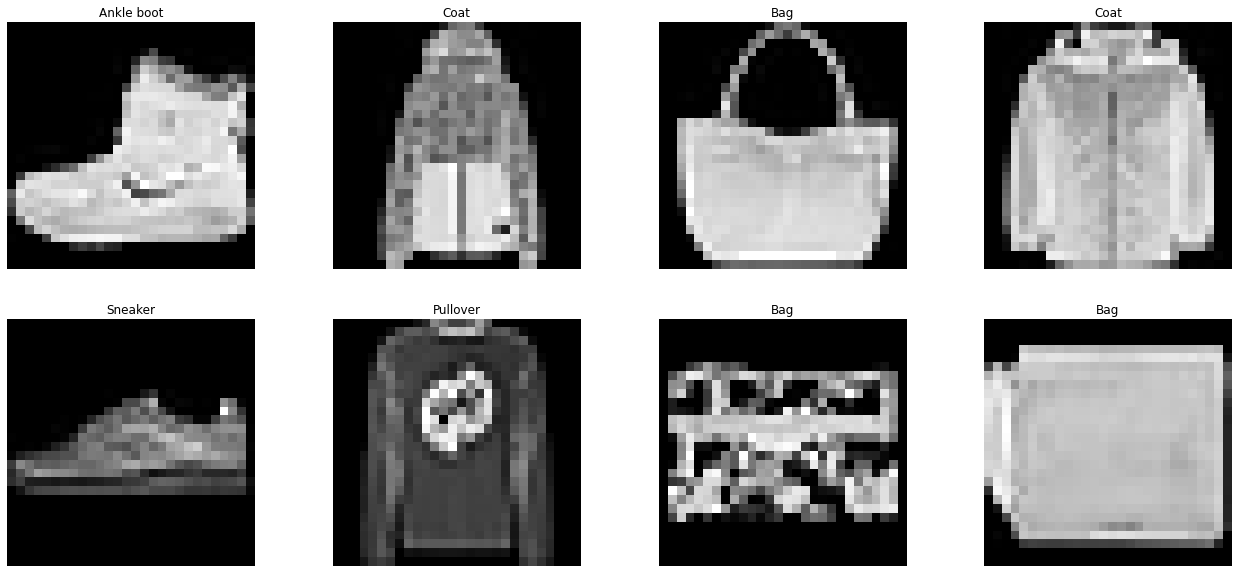

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

############################
# Your code here


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [14]:
from sklearn.linear_model import Perceptron as Perceptron 

##################
# Your code here



# Initialize the Perceptron
perceptron = Perceptron()

# Train the Perceptron
perceptron.fit(X_train_scaled, y_train)





Perceptron()

In [15]:
from sklearn.metrics import accuracy_score

##################
# Your code here

# Predicting on the test set
y_pred = perceptron.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8115714285714286


<font color='red'>Enter your text here</font>

Given the intrinsic simplicity of the perceptron model, an accuracy of roughly 81.16% for a perceptron model on the Fashion-MNIST dataset is pretty remarkable. Being a basic type of neural network, the perceptron is distinguished by its simple structure, with just one layer and no hidden layers. The simplicity of its structure naturally restricts the model's capacity to identify and comprehend intricate patterns present in the data. In light of this, reaching an accuracy of more than 80% is praiseworthy and shows that the model can reasonably discriminate between various types of fashion goods.

Compared to simpler datasets like the MNIST digits, the Fashion-MNIST dataset, which consists of grayscale photos of diverse fashion items, poses a more difficult challenge. Classifying the numerous apparel items with different textures and shapes included in the Fashion-MNIST photos is intrinsically more difficult than classifying handwritten digits. As a result, the perceptron's ability to accurately classify these items in a sizable portion of situations demonstrates its efficacious feature learning skills.

It's critical to place this accomplishment in perspective by contrasting its capabilities with those of more sophisticated models. In the deeper learning domain, more complex models like convolutional neural networks (CNNs) have demonstrated the capacity to attain significantly greater accuracy, especially in picture classification tasks. CNNs are especially well-suited for image data because of their ability to learn the spatial hierarchies of features. These models need more time and computer power to train since they are more complicated.

Practically speaking, an accuracy of more than 80% is undoubtedly good for a simple model, but it might not be totally adequate for some real-world applications, especially in commercial contexts. For example, a higher degree of precision would be ideal in the fashion business, where precise item classification is essential to client pleasure. Items that are misclassified may cause a number of problems, such as logistical difficulties and unsatisfied customers.

Lastly, the Fashion-MNIST dataset findings obtained by the perceptron can be a useful starting point for further modelling endeavours. This performance can be used as a benchmark for experimenting with more sophisticated algorithms or improvements to the perceptron model, enabling a more transparent comparison of the efficiency of other models in categorising fashion products.

In short, the Fashion-MNIST dataset shows that the perceptron can be a useful tool for certain classification tasks, even though its performance is not as good as that of more sophisticated models. On the other hand, investigating more advanced models and techniques might make sense as the next phase for more difficult applications.

**4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)**

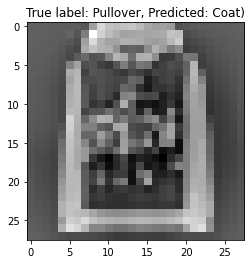

In [16]:
# Finding misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0]
if len(misclassified_indices) > 0:

    misclassified_index = misclassified_indices[0]
    plt.imshow(np.reshape(X_test_scaled[misclassified_index], (28, 28)), cmap='gray')
    plt.title(f"True label: {text_labels[int(y_test[misclassified_index])]}, Predicted: {text_labels[int(y_pred[misclassified_index])]})")
    plt.show()


The model predicted "Coat" in the case above, however the correct label is "Pullover." This kind of misclassification is frequently seen in models that are too shallow to discern subtle differences between related categories and instead rely on basic features. In low-resolution grayscale images like as those in the Fashion-MNIST dataset, pullovers and coats might share similar textures and shapes.

The item of clothing in the picture has long sleeves and a high neck, which are characteristics of both jackets and pullovers. The image's absence of colour and finer texture features make classification even more challenging. The model must mostly depend on the garment's shape and outline in a grayscale image, which can be quite comparable for jackets and pullovers.

When handling complex, real-world data, simplistic models like the perceptron have limits that are highlighted by this type of misclassification. While the perceptron is capable of capturing simple patterns, its deep, layered structures may make it difficult for it to handle nuances that call for the model to learn from a more complex hierarchy of information. This is something that more sophisticated models, like as CNNs, are better at handling.

The outcome is an illustration of how the simplicity of the concept causes problems. It implies that a model that can capture a more detailed feature representation would be useful for more accurate fashion item classification. This might be accomplished by designing more features that could aid in differentiating between such similar categories, or by using a more sophisticated neural network architecture.

**5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.**

The multiclass perceptron is an enhanced version of the standard perceptron algorithm, originally designed for binary classification problems, that has been extended to accommodate situations with multiple classes that need to be differentiated. The fundamental concept underlying a perceptron entails the construction of a decision boundary, which can be represented as a line or hyperplane, with the purpose of distinguishing between two distinct classes. In the setting of numerous classes, the concept is further developed by establishing various boundaries, each designed to distinguish a specific class from all others.

In practical applications, it is common to employ N perceptrons to address an issue involving N distinct classes. Each participant undergoes training to develop the ability to identify a certain class, so effectively approaching the problem as N distinct binary classification tasks. As an illustration, in the case of three classes, the initial perceptron would acquire the ability to distinguish the first class from the second and third classes, while the second perceptron would be responsible for distinguishing the second class, and so on. During the training phase, the perceptron associated with the accurate class for a specific data point is modified in order to accurately categorise that point, whereas the remaining perceptrons are updated to classify it as a negative instance.

In the context of classifying new instances, each perceptron that has undergone training offers a score that signifies its level of confidence in assigning the example to its respective class. The ultimate determination regarding the class of the given example is generally reached by selecting the class associated with the perceptron that yields the highest confidence score. This approach enables the straightforward, sequential decision-making procedure of a perceptron to be expanded for tackling intricate, multiclass scenarios.

Nevertheless, this methodology may provide additional complexities, such as the predicament of resolving situations where several perceptrons concur and produce affirmative outcomes for their corresponding categories, or the quandary of managing situations with equal scores. Resolving these concerns frequently entails the deployment of a discernment system to identify the most assured perceptron or employing a vote mechanism among the perceptrons to determine the final result. Notwithstanding the intricacies involved, the multiclass perceptron continues to be a valuable instrument in the field of machine learning when confronted with datasets that exhibit multiple classes. It offers a means to expand the uncomplicated and computationally efficient binary classification procedure of the perceptron to encompass a wider array of applications.

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,). 

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [17]:
from sklearn.neural_network import MLPClassifier

#######################
# Your code here


from sklearn.metrics import accuracy_score


mlp_class = MLPClassifier(hidden_layer_sizes=(20,), alpha=0.1, verbose=1, random_state=1)

# Training the neural network
mlp_class.fit(X_train_scaled, y_train)

# Predictions for train data set
y_train_predict = mlp_class.predict(X_train_scaled)

# Predictions for the test data set
y_test_predict = mlp_class.predict(X_test_scaled)

# accuracy on the training set
train__accuracy = accuracy_score(y_train, y_train_predict)
print("Training accuracy:", train__accuracy)

#  accuracy on the test set
test__accuracy = accuracy_score(y_test, y_test_predict)
print("Test accuracy:", test__accuracy)


Iteration 1, loss = 0.63982681
Iteration 2, loss = 0.43309333
Iteration 3, loss = 0.39753066
Iteration 4, loss = 0.37727725
Iteration 5, loss = 0.36473861
Iteration 6, loss = 0.35406314
Iteration 7, loss = 0.34652351
Iteration 8, loss = 0.34180317
Iteration 9, loss = 0.33441681
Iteration 10, loss = 0.33036474
Iteration 11, loss = 0.32661593
Iteration 12, loss = 0.32187934
Iteration 13, loss = 0.31980492
Iteration 14, loss = 0.31658098
Iteration 15, loss = 0.31249897
Iteration 16, loss = 0.31143816
Iteration 17, loss = 0.30885581
Iteration 18, loss = 0.30687183
Iteration 19, loss = 0.30333655
Iteration 20, loss = 0.30351777
Iteration 21, loss = 0.30051948
Iteration 22, loss = 0.29833242
Iteration 23, loss = 0.29844625
Iteration 24, loss = 0.29638867
Iteration 25, loss = 0.29463795
Iteration 26, loss = 0.29338758
Iteration 27, loss = 0.29279986
Iteration 28, loss = 0.29166540
Iteration 29, loss = 0.29030085
Iteration 30, loss = 0.28960588
Iteration 31, loss = 0.28718995
Iteration 32, los

In [18]:
from sklearn.metrics import accuracy_score

#######################
# Your accuracy score code here
print("Test accuracy:", test__accuracy)



Test accuracy: 0.8697857142857143


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

<font color='red'>Enter your text here</font>

**1. Size of the Input Layer:**

In a neural network, the number of features in the dataset that is being used for training determines the size of the input layer. For the Fashion-MNIST dataset, there are 784 features because each image has 28 by 28 pixels (every pixel is a feature). Consequently, this neural network's input layer contains 784 neurons.

**2. Size of the Output Layer:**

 The quantity of classes that require prediction dictates the dimensions of the output layer. There are ten distinct classes (each representing a kind of apparel) for the Fashion-MNIST dataset. As a result, the neural network's output layer contains ten neurons, each of which represents a class.

**3. Total Weights learned by the Algorithm:**

The sum of all the weights in each layer determines the total number of weights in the neural network. There are 784 neurons in the input layer, 20 neurons in the hidden layer, and 10 neurons in the output layer of the network that is described. The following are the weights:
    There are 15,680 weights total between the input and hidden layers (784 input neurons * 20 hidden neurons).
    Twenty hidden neurons * ten output neurons = 200 weights are the weights between the hidden and output layers.
    In addition, every neuron in the output and hidden layers has a bias term. Consequently, the output layer has 10 biases         while the hidden layer has 20 biases.
    Thus, 15 680 + 200 + 20 + 10 = 15 910 is the total amount of weights and biases.

**4. Different Training and Test Accuracies:**

The neural network's ability to generalise to new, untested input is indicated by the difference between the training and test accuracy. In this instance, the test accuracy is lower than the training accuracy. The model may be overfitted if it performs exceptionally well on training data but poorly on test data. A model's capacity to perform well on fresh data is compromised by overfitting, which happens when a model learns the training data—including its noise and any outliers—too closely. Although there isn't much of a difference in this instance, it's standard procedure to look for methods to get closer, including gathering more training data, simplifying the model, or using regularisation techniques.

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

In [22]:


########################
# Your classifier training code here

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# different widths for the hidden layer
hidden_sizes = [20, 50, 100, 200]

train_accuracies = []
test_accuracies = []

# Iterating over the different sizes of the hidden layer
for size in hidden_sizes:
    # Initializing MLPClassifier
    mlp_ = MLPClassifier(hidden_layer_sizes=(size,), alpha=0.001, random_state=42)
    
    # Fit the model to the training data
    mlp_.fit(X_train_scaled, y_train)
    
    # Predict and calculate accuracy on the training set
    y_train_predict = mlp_.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_predict)
    train_accuracies.append(train_accuracy)
    
    # Predict and calculate accuracy on the test set
    y_test_predict = mlp_.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    test_accuracies.append(test_accuracy)



C:\Users\Ananya\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


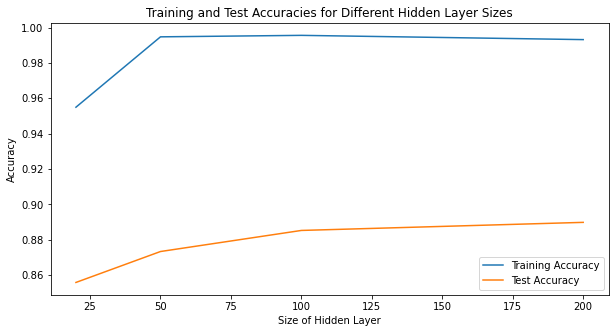

In [23]:
import matplotlib.pyplot as plt

########################
# Your plot of training and test accuracy here

# plot the results
plt.figure(figsize=(10, 5))
plt.plot(hidden_sizes, train_accuracies, label='Training Accuracy')
plt.plot(hidden_sizes, test_accuracies, label='Test Accuracy')
plt.xlabel('Size of Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies for Different Hidden Layer Sizes')
plt.legend()
plt.show()


Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

**1. Training Time for Different Widths:**

Each model's training duration typically grows as the breadth of the hidden layer (i.e., the number of neurons) increases. This is so that the algorithm may learn additional parameters (weights and biases) when there are more neurons. Because every neuron in a layer is connected to every other neuron in the layer before it, as the number of neurons increases, so does the number of connections (and hence, weights).
Because there are fewer parameters to alter, training is comparatively quick for smaller widths, such as 20 neurons. Longer training times are caused by the model's increased complexity when the breadth grows to 50, 100, and notably 200 neurons.
The longer training period is caused by the increased number of weights as well as the larger, more complicated space that must be navigated by the optimisation method (usually gradient descent or a variant) in order to discover the ideal weights.

**2. Inference based on the graph:**

Optimal Neuron Count: The graph indicates that, for any given number of neurons, training accuracy is almost flawless, but test accuracy eventually reaches a plateau and does not exhibit any discernible improvement. In these situations, the configuration with the fewest number of neurons and high test accuracy is considered to be the "optimal" one. Based on the graph, it seems that test accuracy does not dramatically increase beyond the smallest tested size of 20 neurons, indicating that we have already achieved a good trade-off between complexity and performance at the smallest size.

Number of Weights in Optimal Solution: Considering that each image in the dataset is 28x28 pixels (784 input features), and that there are 10 output classes, we may conclude that the optimal number of neurons is 20, as shown by the plateau in test accuracy. Consequently, the total number of weights would be as follows:

(784 × 20) + (20 × 10 ) = 15, 680 + 200 = 15, 880 (784 × 20) + (20 × 10) = 15,680 + 200 = 15,880
In addition, each neuron in the hidden layer and output layer has bias terms that add 20 and 10, respectively. This results in a total of:

Weights and biases in 15, 880 + 20 + 10 = 15, 910 weights and biases.

Evidence of Overfitting: A classic indicator of overfitting is the graph's significant divergence between the training and test accuracies. The model shows that it has probably memorised the training data instead of learning the underlying patterns that generalise to unseen data because it is almost flawless on the training set but significantly less accurate on the test set.

To reduce overfitting, a number of tactics could be used:

Regularisation: Raising the alpha parameter, or regularisation strength, may assist keep the model from fitting the training set too closely.

Data augmentation: The model may pick up more resilient traits if the training set is purposefully expanded by adding altered copies of the training images (such as minor shifts, rotations, or zooms).

Dropout: By randomly setting a portion of the input units to 0 at each training update, dropout helps simulate having a wide variety of distinct network topologies and can also help prevent overfitting in networks.

Early Stopping: In this scenario, the training procedure is terminated before the model has an opportunity to become overfit. The graph appears to indicate that since test accuracy gains plateau after a given number of epochs, training could end considerably sooner.

Simplifying the Model: By making it easier for the model to learn the data, fewer neurons or layers in the network can also lessen overfitting.
In conclusion, the model that performs best when applied to new data tends to be more effective than the one with the greatest number of neurons. A more basic model would probably be adequate for this task, as the graph indicates that increasing the model's complexity does not improve performance on unknown data.

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [26]:
########################
# Your classifier training code here

import warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


layer = [(20, 20), (20, 20, 20), (50, 20), (100, 100, 50)]


train_acc = []
test_acc = []


for config in layer:
    
    mlp = MLPClassifier(hidden_layer_sizes=config, alpha=0.001, random_state=42)
    
    
    mlp.fit(X_train_scaled, y_train)
    
    # Predicting and calculating accuracy on the training set
    y_train_predict = mlp.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_predict)
    train_acc.append(train_accuracy)
    
    # Predicting and calculating accuracy on the test set
    y_test_predict = mlp.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    test_acc.append(test_accuracy)




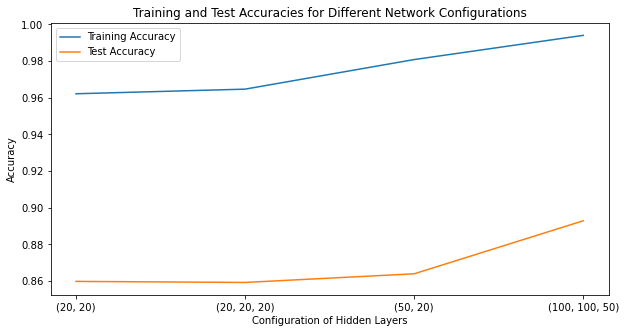

In [27]:
import matplotlib.pyplot as plt

########################
# Your visualisation code here

plt.figure(figsize=(10, 5))
plt.plot([str(config) for config in layer], train_acc, label='Training Accuracy')
plt.plot([str(config) for config in layer], test_acc, label='Test Accuracy')
plt.xlabel('Configuration of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies for Different Network Configurations')
plt.legend()
plt.show()


#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>Enter your text here</font>

**Performance of Deeper Networks vs. Wider Networks:**

The graph indicates that even with fewer total neurons, deeper networks can get test accuracy that is on par with or better than larger networks. In the preceding graph, the single layer of 50 or even 100 neurons seemed to perform worse than the setup with two hidden layers of 20 neurons each. This suggests that, as opposed to just adding breadth, boosting depth to the network can improve its ability to capture the intricacy of the input more effectively.
The quantity of weights in various configurations:

It add up the weights between each layer to determine the total amount of weights for any network setup. Taking the first setup (20, 20) as an example:

There are 15,680 weights separating the input layer (784 neurons) and the first hidden layer (20 neurons): 784 * 20.

20 * 20 = 400 weights separate the 20 neurons in the first hidden layer from the 20 neurons in the second hidden layer.

20 * 10 = 200 weights separate the output layer (10 neurons) from the second hidden layer (20 neurons).

Including biases in the output layer and the two hidden layers for every neuron: Biases: 20 + 20 + 10 = 50

Total for the configuration of (20, 20): Weights and biases: 15,680 + 400 + 200 + 50 = 16,330.

For the (100, 100, 50) arrangement:

First hidden layer input: 78,400 weights (784 * 100).

First to second hidden layer: 10,000 weights (100 * 100).

Weights in the second to third buried layer are 100 * 50 = 5,000.

Output of the third hidden layer is 50 * 10 = 500 weights.

Biases: 260 biases total (100 + 100 + 50 + 10).

Weights and biases total for the (100, 100, 50) arrangement are 78,400 + 10,000 + 5,000 + 500 + 260 = 94,160.

These calculations demonstrate that, compared to the very wide network from the previous example, which contained a single layer of 200 neurons, even the deepest network examined ((100, 100, 50)) requires less weights—roughly 158,000 weights, assuming biases are not taken into account.


**Training Weights Efficiency:**

It can be seen from the graph, deepening the network generally results in much higher training accuracy and, to a lesser extent, sometimes even higher test accuracy. This implies that deeper networks—possibly with fewer weights—are more effective at learning the training set. The training and test accuracies, however, clearly differ, suggesting the danger of overfitting, especially in the deeper networks.
In conclusion, the graph shows that even with a reduced total number of neurons and weights, deeper networks can function well—sometimes even better than larger, shallower networks. This illustrates how deeper networks may learn more intricate features and hierarchies from data, however managing overfitting as network depth rises requires caution.


## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

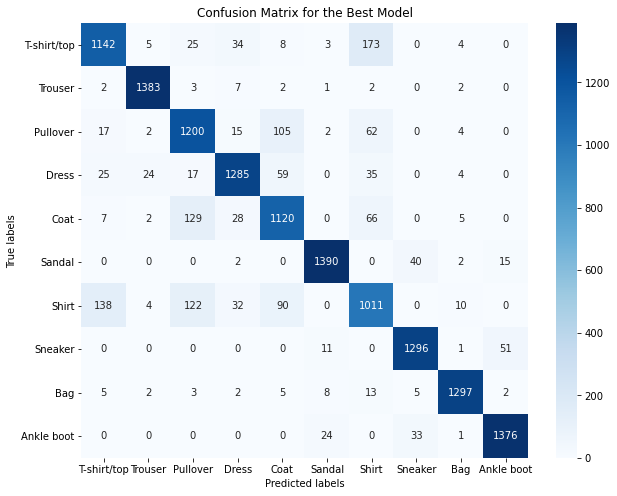

In [28]:
########################
# Your code here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

conf_matrix = confusion_matrix(y_test, y_test_predict)
# confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=text_labels, yticklabels=text_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the Best Model')
plt.show()


<font color='red'>Enter your text here</font>

The performance of a classification model on the test set is displayed in the given confusion matrix. We can infer the following:

Diagonal Dominance: Correct classifications are shown by high values along the diagonal that runs from top left to bottom right, when the predicted labels coincide with the true labels. This dominance implies that the model is operating at a generally high level.

Misclassifications: A few off-diagonal elements have comparatively high values, which suggests that they have been misclassified. Among the misclassified items, "Shirt" appears to be the most common, possibly due to major misunderstanding with "T-shirt/top," "Pullover," and "Coat." This can be because these clothes items have comparable looks.

Extremely Accurate Predictions: The model appears to be especially adept at identifying certain classes, such as "Trouser" and "Sandal," as evidenced by the extremely high percentage of correctly predicted items and low percentage of misclassifications.

Misclassifications that are symmetric: Misclassifications that are symmetric include the misclassification of "Coat" as "Pullover" and vice versa. This suggests that the model is unclear because these classes share certain common traits.

Least Misclassified: "Bag" and "Ankle boot" have high true positive rates and a low percentage of cases that are mistaken for other classes, making them among the least misclassified.